# Capstone Part 04
*Text Classification using Natural Language Processing*
### Submitted by Roshan Lulu
___



<img src="./assets/images/1_causeeffect.png" alt="Drawing" style="width:200px" align="middle"/>
___
# Common causes of plane crashes
# 1. Introduction


For my Capstone project I have been analysing plane accidents from the past century. One aspect of my analysis is the reasons for the accidents. My hypothesis is that the accidents are not always an isolated incident. So in my journey I am trying to identify accidents that have a similar cause.


Aviation accidents can be traced to a variety of causes, including pilot error, air traffic controller error,design and manufacturer defects, maintenance failures, sabotage, or inclement weather, Human error, Maintanence Negligence, Design and Manufacturing, Corporate Negligence and many more. I am interested in analysing the causes of the accidents. 
> 
- **Dataset**: Given my input datasets and its features, the causes are not a feature that was easily available for analysis. Instead, the dataset has a summary/narrative of the incident as a feature. In order to answer my problem statement I am going to use Natural Language Processing techniques. 
- **Libraries used**: Pandas and NLP were used to extract n-gram words that specify the accident reason. Plotting techniques like Wordcloud are used to plot the commonly used words to describe each category
- **Approach**: Use NLTK libraries to train a model that categorizes the reason of each accident base don unstructured text.
- **Challenge**:
    - The causes are not directly available in the dataset.
    - The dataset contains unstructured textual content that describes the cause of the accident.
    - A model always requires an available/training set which will then be used to fit on the unseen or  future data. 
    - Normally, if a label was already available, a train-test split method could be applied to create a model.
    - Work Around: Thanks to google, I was able to read about quite a few causes. I have collected textual information that contains the key words that contribute to categorize the cause. The models will be trained with this text set. The trained model will be applied on the dataset to get the classification.

## 2. Import dataset and Examine the dataframe

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(font_scale=1.5)

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [2]:
data = pd.read_csv('./dataset/cleaned_merged_dataset.csv')

In [3]:
data.columns

Index(['Engines', 'Narrative', 'FlightNumber', 'AirplaneDamage', 'Phase',
       'DestinationAirport', 'Date', 'Time', 'DepartureAirport', 'Operator',
       'AirplaneFate', 'FirstFlight', 'Nature_Code', 'Type_Code',
       'Engine_Type', 'Engine_count', 'Crew_Fatal', 'Crew_Occ', 'Total_Fatal',
       'Total_Occ', 'Psngr_Fatal', 'Psngr_Occ', 'GndFatal', 'Coll_Fatal',
       'Crash_Elev_m', 'Day', 'Month', 'Year', 'Dep_Airport_1',
       'Dest_Airport_1', 'Age', 'Country', 'latlon', 'sub_place', 'Continents',
       'Hemisphere', 'Seasons', 'orig_latitude', 'orig_longitude', 'Decade'],
      dtype='object')

In [4]:
data.Nature_Code.value_counts()

Military                2147
Passenger - Domestic    2005
Unknown                 1235
Cargo                    822
Passenger - Intl         695
Train/Test/Demo          340
Ferry/positioning        282
Executive                212
Private                  169
Agricultural              71
Illegal Flight            58
Ambulance                 38
Fire fighting             24
Name: Nature_Code, dtype: int64

In [5]:
# mask = (data.Nature_Code == 'Passenger - Domestic') | (data.Nature_Code == 'Passenger - Intl')
# data_comm = data[mask]
# mask = (data.Year > 1960)
# data_comm = data_comm[mask]

In [6]:
print('Length of Data frame', data.shape[0])
for col in data.columns:
    try:
        if(len(data_comm[data[col] == '-']) != 0):
            print(col, len(data[data[col] == '-']))
    except:
        continue

# Unknown values more for : Engines, Airplane Fate, 

Length of Data frame 8098


In [7]:
# check_year = pd.DataFrame(data['Year'].value_counts().sort_values(ascending = False)).reset_index()
# check_year.reset_index(drop = True, inplace = True)
# check_year.columns = ['Year', 'Count']
# check_year.sort_values('Year', ascending =False)

In [8]:
data.shape

(8098, 40)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8098 entries, 0 to 8097
Data columns (total 40 columns):
Engines               8098 non-null object
Narrative             8098 non-null object
FlightNumber          8098 non-null int64
AirplaneDamage        8098 non-null object
Phase                 8098 non-null object
DestinationAirport    8098 non-null object
Date                  8098 non-null int64
Time                  8098 non-null object
DepartureAirport      8098 non-null object
Operator              8098 non-null object
AirplaneFate          8098 non-null object
FirstFlight           8098 non-null int64
Nature_Code           8098 non-null object
Type_Code             8098 non-null object
Engine_Type           8098 non-null object
Engine_count          8098 non-null float64
Crew_Fatal            8098 non-null int64
Crew_Occ              8098 non-null int64
Total_Fatal           8098 non-null int64
Total_Occ             8098 non-null int64
Psngr_Fatal           8098 non-null int

In [10]:
data.Narrative.head()

0    A Beech 1900D aircraft operated by North-Wrigh...
1    A Shorts 330 cargo plane impacted wooded terra...
2    The pilot of a Cessna 208B Grand Caravan was k...
3    The Junkers Ju-52/3mce named "Huanuni" crashed...
4    Crashed in bad weather. Flight: Paris-Lyon-Mar...
Name: Narrative, dtype: object

In [11]:
# Copy data to a new dataframe
txt_data = data[:]

## 3. Start Text Analytics

In [12]:
from nltk.corpus import stopwords
from collections import Counter

from textacy.preprocess import preprocess_text

from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

### CREATE STOP WORDS ( THIS HAS BEEN AN ITERATIVE PROCESS)

In [13]:
# Creating stop words database for all the numbers
stop = stopwords.words('english')
stop += ['00', '000', '01', '02', '03', '04', '04r', '05', '050', '05l', '05r', '06', '06r', '07', '08', '080', '09', '09r', '10', '100', '1000', '10000', '102', '103', '104', '1049', '105', '106', '107', '108', '109', '10deg', '10l', '11', '110', '1100', '111', '111f', '112', '113', '114', '115', '116', '117', '118', '118a', '119', '11f', '11s', '12', '120', '1200', '12000', '121', '361', '376','122', '123', '124', '124c', '125', '128', '129', '12bk', '13', '130', '1300', '130b', '130e', '130h', '130j', '131', '133', '134', '135', '135a', '139', '13l', '14', '140', '1400', '141', '1420', '145', '14500', '146', '148', '15', '150', '1500', '153', '154', '157', '158', '159', '15deg', '16', '160', '1600', '163', '165', '166', '168', '16r', '17', '170', '1700', '172', '175', '1750', '17l', '18', '180', '1800', '180deg', '185', '188', '19', '190', '1900', '1900c', '1900d', '191', '1936', '1938', '1940', '1941', '1942', '1943', '1944', '1945', '1948', '1949', '1950', '1951', '1953', '1954', '1955', '1957', '1963', '1964', '1966', '1968', '1969', '1972', '1973', '1974', '1978', '1979', '1980', '1981', '1982', '1983', '1985', '1986', '1988', '1990', '1991', '1992', '1993', '1994', '1997', '1998', '1999', '19r', '1a', '1a10', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '200c', '201', '2011', '2013', '2015', '202', '203', '2050', '207', '208', '208b', '20deg', '21', '210', '211', '212', '215', '22', '220', '2200', '222', '225', '227', '228', '22l', '23', '230', '2300', '232', '235', '24', '240', '2400', '241', '242', '24b', '24l', '24r', '24rv', '25', '250', '2500', '25l', '26', '260', '265', '266', '26b', '26l', '27', '270', '2700', '27l', '27r', '28', '280', '2800', '285', '28l', '28r', '29', '290', '29l', '2a', '2r', '2t', '30', '300', '3000', '304', '306', '30deg', '31', '310', '31242', '31243', '314', '315', '31l', '31r', '32', '320', '3200', '320o', '322', '325', '328', '32l', '32r', '33', '330', '3300', '330o', '336', '338', '33l', '34', '340', '340b', '340o', '345', '35', '350', '3500', '350o', '35a', '35l', '36', '360', '3600', '37', '38', '39', '390', '3a', '3c', '3deg', '3m', '3mge', '3t', '40', '400', '4000', '41', '410', '410uvp', '42', '420', '4200', '43', '430', '436', '44', '440', '45', '450', '4500', '45deg', '46', '46d', '47', '470', '4700', '47a', '47b', '47d', '47s', '48', '49', '50', '500', '5000', '501', '504', '50832', '50deg', '51', '52', '525', '53', '54', '5400', '55', '550', '5500', '56', '57', '58', '580', '59', '5a', '5h', '5n', '5nm', '5y', '60', '600', '6000', '601', '61', '610', '62', '620', '63', '631', '64', '640', '65', '650', '6500', '66', '67', '68', '6a', '6e', '70', '700', '7000', '707', '71', '710', '72', '720', '725', '727', '73', '737', '74', '747', '748', '75', '750', '7500', '756', '757', '76', '767', '767s', '76md', '770', '777', '78', '78505', '7nm', '80', '800', '8000', '801', '81', '811', '812', '82', '8235', '8241', '82a', '83', '84', '85', '850', '8500', '86', '87', '88', '8807', '89', '8q', '8th', '90', '900', '9000', '90deg', '91', '910', '92', '93', '931', '94', '95', '96', '97', '98', '99', '990', '9k', '9n', '9q', 'a100', 'a300', 'a310', 'a319', 'a320', 'a321', 'a330', 'a6m2', 'aa', 'aaa', 'aab', 'aaf', 'ab', 'ababa']
stop += ['08r', '1009', '101', '1011', '104b', '144', '21st', '221', '22285', '231', '23l', '300yds', '301', '3100', '318', '319', '31de', '321', '321b', '324', '3277', '33666', '33r', '380', '3800', '395', '39a', '3mce', '400a', '402q', '40563', '40deg', '415', '42e', '42w', '4300', '451', '460', '701', '702', '712', '730', '740', '75a', '76td', '7700', '775', '780', '78270', '78462', '785', '797', '800xp', '823', '841', '8as', '8r', '901', '919', '920', '926', '980', '9j', '9l', '9m']
stop += ['675','680','6800','6b', '000ft']
stop += ['airport', 'airplane','aircraft', 'approach',
 'crashed','crew','feet','flight','following','main','members','near','one','operated','passenger','passengers','plane','runway','struck','substantial','sustained','three','took','two','boeing','dc','due','beyond',
 'damaged','b200','repair', 'miles', 'km', 'air', 'lines', 'departed', 'abort', 'takeoff', 'landing', 'reported', 'airline', 'captain'
 ]
stop += ['001', '0014', '002', '003', '006', '010', '010º', '0127', '015', '017', '0171', '0173', '0195', '01l', '01r', '020', '020deg', '0218', '022', '024', '0256', '02801', '02r', '030', '030º', '0326', '0328', '040', '040b', '040deg', '044', '045', '0450', '0462', '0463', '049', '04l', '053', '0597', '060', '0602', '060deg', '061', '064', '069', '06l', '070', '0703', '0705', '0719', '072', '0730', '07308', '075deg', '076', '07l', '07r', '0839', '085', '0850', '08l', '090', '0900', '090deg', '092', '094', '0970', '0972', '0981', '09l', '1002', '1006', '1007', '1008', '100912', '100deg', '100e', '100er', '100nm', '100yds', '10100', '1015', '1018', '1020', '10200', '1024', '1025', '1027', '10350', '1036', '1040', '1041k', '104g', '1050', '10500', '1054', '10554', '1058', '1060', '10687', '1069', '1070', '10737', '1074', '1075', '1081', '1086', '10884', '10942', '109770', '10a', '10f', '10nm', '11000', '110c', '110p1', '1114', '1120', '11200', '1121', '1123', '1124', '1124a', '1132', '1140', '11500', '1154', '1159', '11600', '11620', '1169', '1170', '1171', '1173', '117d', '11800', '11900', '1198', '119b', '119c', '119cf', '119f', '119k', '11a', '11deg', '11dme', '1200yds', '120er', '1212', '1215', '121d', '121g', '121k', '121m', '122443', '1229', '1230', '12328', '12364', '123k', '12435', '12467', '124a', '1250', '12500', '1255', '125kts', '126', '1260', '12600', '127', '1276', '1277', '127723', '1279', '1281', '1296', '12a', '12b', '12bp', '12deg', '12l', '12n', '12p', '12th', '12w', '13000', '1300k', '1301', '1307', '130a', '130f', '130kias', '130m', '130p', '130r', '1310', '131582', '131639', '131e', '131f', '132', '1320', '13200', '1322', '1325gal', '1329', '1338', '133b', '133deg', '1340', '13400', '1342', '1347', '134a', '134ak', '13500', '135350', '1355', '135deg', '135j', '135kl', '135lr', '135n', '135r', '135s', '135t', '135v', '136', '1360', '137', '1370', '137e', '138', '13807', '1390', '13e', '13r', '14000', '1400z', '140a', '141b', '142', '143', '1436', '1440', '1449', '144a', '1450', '1455', '1457', '145kts', '145li', '145lr', '145lu', '146deg', '147', '1486', '149', '1490', '1493', '1495', '14970', '149813', '149d', '14b', '14fkm', '14p', '14th', '15000', '1500yds', '1500z', '1502', '1509', '150deg', '150f', '150ft', '150h', '150m', '151', '151890', '152', '15200', '152608', '1533', '1535', '1539', '1541', '1545', '1549', '154a', '154b', '154m', '155', '1550', '155130', '1553', '15585', '155deg', '156', '15652', '15677', '1568', '1570', '15721', '157332', '15800', '158761', '1588', '158930', '159325', '15f', '15l', '15r', '15s', '15th', '15tm', '16000', '1602', '160r', '161', '1610', '16100', '162', '164', '1640', '1645', '16481', '1649a', '16500', '165522', '165525', '1669', '167', '16720', '1687', '1690', '16a', '16b', '16d', '16f', '16l', '16th', '17000', '17010', '1707', '1709', '1716', '171st', '1720', '1721', '1723', '172n', '173', '1730', '1733', '1736', '17388', '174', '1763', '1768', '178', '178deg', '179', '1790', '17c', '17f', '17g', '17r', '17th', '18000', '1801', '181', '1810', '1814', '182', '18255', '1828', '182l', '1833', '1840', '18440', '1850', '1851', '18591', '18598', '186', '1860', '187', '1870', '1880', '1885', '189', '18930l', '18a', '18b', '18d', '18r', '18th', '18v', '19000', '1902', '1908', '1909', '190deg', '1910', '1918', '192', '1920', '1921', '1922p', '1923', '1925', '1929', '193', '1930', '1933', '1934', '1935', '1937', '1939', '194', '1946', '1947', '195', '1952', '1956', '1958', '1959', '1960', '1961', '1962', '1967', '197', '1970', '1971', '1975', '1976', '1977', '198', '1984', '1987', '1989', '1990s', '1995', '1996', '199deg', '19a', '19l', '1b', '1g167', '1h', '1h18', '1hour', '1l', '1r', '20000', '2000ft', '2008', '2009', '200b', '200deg', '200er', '200ft', '200x100', '200yds', '2010', '2012', '2014', '2016', '2025', '204', '204b', '205', '206', '206b', '2086', '209b', '20c', '20f', '20gmt', '20l', '20r', '20th', '2100', '2104', '2110', '212667', '212a', '213', '214', '21504', '216', '2165', '218', '21b', '21l', '21mf', '21r', '21u', '2200m', '220º', '2215', '2219', '221f', '2230', '224', '2250rpm', '226', '227ac', '227b', '227bc', '2280', '2284', '2286', '229', '2295', '22c', '22r', '2300yds', '2303', '2311', '2318', '233', '23310', '23488', '2350', '235m', '236', '2370', '238', '238b', '23f', '23r', '24000', '2400rpm', '2406', '240deg', '2422x', '243', '245', '2450', '246', '2460', '246er', '246tg', '247', '247d', '248', '2487', '24a', '24bi', '24kay', '24ko', '24th', '25000', '2501f', '250deg', '250yds', '250º', '251', '2523', '255', '2560', '258', '25b', '25d', '25deg', '25g', '25nm', '25pd', '25r', '25th', '2600', '2600rpm', '260deg', '261', '2615', '2620', '263', '2638', '26492', '2650', '2652', '26r', '27097', '270deg', '271', '2710', '2720', '2733', '2734', '274', '2740', '2747', '275', '2750', '277', '2771', '2790', '27deg', '27th', '280c', '280º', '2813', '2823', '283er', '284', '2841', '2850', '2850rpm', '286', '287', '2873', '288', '2885', '28d', '28nm', '28p', '28th', '2900', '291', '2925', '295m', '296', '297', '298', '29nm', '29r', '2a8', '2b', '2deg', '2e', '2f', '2h', '2nd', '2nm', '2p', '2sq', '2t5', '2tp', '2u3b', '3002', '300er', '300s', '300º', '302ftu', '303', '3050', '3068', '306m', '307', '3079', '307b', '308', '30862', '30a', '30b', '30cf', '30f', '30l', '30psi', '30r', '30th', '3102', '3108', '310deg', '310º', '311', '311q', '312', '3120', '3130', '3132', '3137', '3150', '317', '3183', '31fi', '3205', '320º', '3232', '3233', '3244lb', '3252', '3260', '3263', '3281', '328jet', '329c', '32a', '32tons', '32z', '330yds', '330º', '331', '3316', '334', '335', '3380', '339', '33a', '33rc', '3400', '34037', '340a', '340er', '340º', '3416', '342', '343', '343rd', '344', '344c', '3476', '34deg', '34l', '34r', '3506', '350º', '352nd', '353', '354', '3540', '355', '357', '3587', '35deg', '35r', '360deg', '3628', '365', '366', '3666', '366er', '3679', '3680', '368lb', '369', '3698', '36a', '36l', '36n', '36r', '370', '3700', '3700rpm', '371', '3720', '375', '377', '378', '379c', '379th', '381er', '3839x', '384th', '385', '38658', '38667', '387', '389', '38th', '3900', '392', '3930', '39323', '39325', '3960', '398', '39939', '39980', '39n', '3b', '3b4c', '3h4', '3k1c', '3l', '3mfe', '3mg4e', '3mlu', '3mte', '3nm', '3rd', '400b', '400bcf', '400yds', '402', '403', '40312', '404', '4042', '405', '406', '4064', '40641', '4069', '407', '408', '40a', '40cm', '40gmt', '40in', '40k', '40nm', '40s2', '40z', '4100', '411', '412f', '413th', '4146', '418', '41834', '419', '4192', '41deg', '41st', '4204', '422', '42444', '425', '4250', '4265', '42a', '42b', '431', '4317', '4340', '435', '4350', '436th', '4374', '439', '43b', '43s', '4400', '441', '44166', '4422', '444', '4458', '44648', '4479', '4525', '4536', '4539', '455', '457', '45g', '4600', '462', '46327', '465', '467', '46807', '46deg', '46e', '46f', '471', '4723', '47302', '47360', '474', '475', '4750', '477', '47deg', '47e', '47j', '47nm', '47p', '47q', '480', '4805', '481', '484', '4860', '4896', '490', '4900', '4904', '491', '4915', '492', '495', '496', '499', '4a', '4c', '4f', '4g', '4h6', '4k', '4l', '4nm', '4y0', '500ft', '500m', '500sq', '500yds', '501sp', '502', '5049', '505', '506', '507', '508', '509', '50c', '50feet', '50psi', '50s', '50th', '510', '5100', '512', '5120', '5160', '518', '520', '52002', '524', '5250', '525c', '527', '529', '52g', '530', '5300', '530yds', '5315', '5323', '5340', '537', '53d', '540', '5401', '5407', '541', '542ct', '543', '545', '5452', '546', '54a', '54b', '550b', '5513', '553', '5539', '557', '558', '55deg', '55kts', '55th', '560', '5600', '560xl', '561', '5615', '5669', '5675', '56g', '56pst', '56th', '570', '5700', '5711', '572', '5733', '57752', '57760', '5800', '580a', '580as', '5811', '583', '585', '588', '589', '590', '5900', '592', '594', '595', '599', '59d', '5b', '5d', '5deg', '5e', '5f', '5g', '5th', '5v', '5x', '5x61', '600f', '600gal', '600r', '600yds', '6013', '6017', '601e', '602', '603', '60314', '603m', '603sq', '604', '6048', '6050', '605r', '6060', '60deg', '6100', '611', '614', '6150', '6163', '6165', '61708', '618', '621', '623', '6240', '625', '6250', '626', '627', '628', '6289', '6291', '62f', '630', '6300', '634', '6343', '635', '6350', '6354', '63f', '6400', '642', '6420', '643', '6448', '64w', '6500ft', '65120', '652', '6526', '654', '655', '65691', '658', '65856', '65nm', '661', '663', '6631', '664', '666', '6700', '670a', '671', '6715', '6745', '676', '67608', '6780', '6800ft', '681', '6865', '687', '6878', '6901', '696', '69620', '6970', '6bf', '6deg', '6in', '6nm', '6th', '70000', '700a', '700b', '70349', '704', '705', '706', '708', '70yds', '7100', '711', '714', '716', '717', '718', '7200', '721', '7218', '724', '726', '72614', '731', '732', '7353', '736', '738', '739', '73960', '7400', '742', '7463', '747sp', '749', '7493', '751', '752', '753', '7533', '75687', '75732', '760', '7613', '7638', '765', '76679', '76685', '76761', '7682', '76825', '76827', '76t', '77', '771', '772', '773', '7743', '77508', '7775', '7800', '7800ft', '7815', '7816', '783', '783cp', '7843', '785d', '7864', '78826', '78849', '79', '790', '793', '7980', '7989', '7b', '7c', '7deg', '7m', '7occupants', '7½', '8000f', '800b', '800ft', '8012', '8015', '8019', '802', '805', '8050', '806', '809', '80c2b2', '80deg', '81000', '813', '8137', '813th', '814', '817', '819', '820', '821', '824', '8276', '82s', '8300', '831', '8315', '832', '835', '8355', '837', '839', '840', '8400', '843', '844', '84738', '84g', '8502', '850xp', '851', '8535', '855', '860', '8600', '861', '8650', '8665', '86a', '86b', '86d', '870', '8700', '8738', '875', '878', '87s', '881', '8810', '88241', '885', '886', '8867', '890', '897', '89d', '8c', '8f600', '8g', '8h4', '8nm', '900c', '9018', '901a', '902', '904', '906', '90nm', '90º', '9100', '911', '914', '916', '918', '9202', '921', '922', '9243', '927', '930', '9300', '933', '9350', '936', '940', '941', '942', '946', '94b', '950', '9500'
         , '953', '95981', '95b', '960', '962633', '9640', '967', '96th', '970', '9700', '975', '9766', '97g', '9800', '983', '984', '9842', '985', '9859', '9877', '9900', '99165', '9925', '9930', '9955', '9975', '99853', '99a', '99c', '9d', '9k38', '9th', '9v', '9w354', 'a1', 'a12', 'a185f', 'a2', 'a23', 'a300b4', 'a31', 'a340', 'a36', 'a4', 'a400m', 'a59', 'a59w', 'a6', 'a65', 'a6m', 'a7', 'aa201', 'aa320', 'aa423', 'aa699', 'aac', 'aam', 'aapo', 'aar', 'aarhus', 'aau']

### TFIDF VECTORIZER - FIND THE MOST COMMON NGRAMS FROM THE NARRATIVE AND PLOT IT!

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# We can use the TfidfVectorizer to find ngrams for us
vect = TfidfVectorizer(ngram_range=(2,2), stop_words=stop)

# Pulls all of the Narratives into one giant string
summaries = "".join(txt_data['Narrative'])
ngrams_summaries = vect.build_analyzer()(summaries)

text = Counter(ngrams_summaries).most_common(4000)

In [15]:
# Convert the text data to dictionary to be used by wordcloud
d = {}
for t, count in text:
    d[t] = count

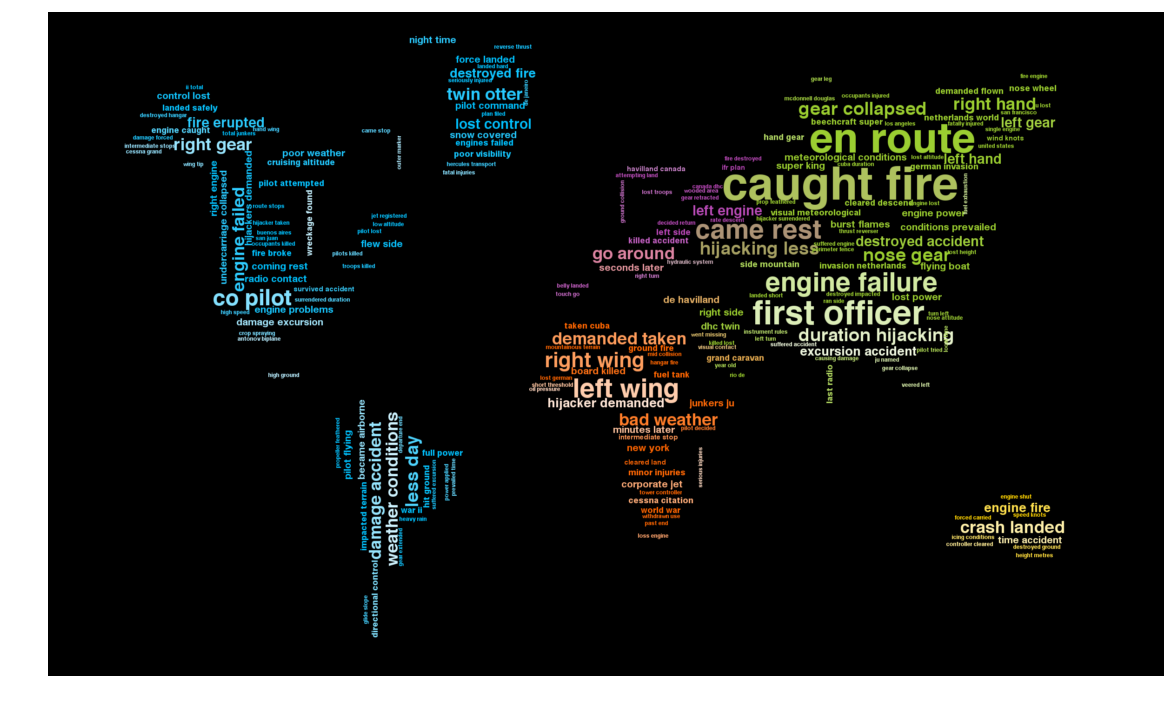

In [16]:
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
p = path.dirname('./assets/images/')

plane_colours = np.array(Image.open(path.join(p, "worldmap.png")))
image_colors = ImageColorGenerator(plane_colours)

wc = WordCloud(font_path = './assets/fonts/Helvetica-Bold.ttf', background_color="black", max_words=4000, mask=plane_colours,
               stopwords=stopwords, max_font_size=80, random_state=40, scale = 3, relative_scaling=1)
# generate word cloud
wc.generate_from_frequencies(frequencies=d)

fig = plt.figure(figsize=(20,20))
# plt.imshow(wc, interpolation="bilinear")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

fig.savefig('./assets/gen_plots/1_flight_ngram.png', bbox_inches='tight')

In [17]:
# # BONUS
# # Using the textacy package to do some more comprehensive preprocessing - Remove punctuations, change to lower case
# summary = txt_data['Narrative'].values
# clean_summary = [preprocess_text(x, fix_unicode=True, lowercase=True, transliterate=False,
#                               no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
#                               no_punct=True, no_accents=True)
#               for x in summary]

## 4. Trials before Modelling 
> 
**( This section is just R & D ; Hence, Ive commented it out )
Below is a section of code that uses different text vectorizer methods tin orde to come up with my selected vectorizer.**
> 
### TOKENIZATION USING COUNT VECTORIZER
- What: Separate text into units such as sentences or words
- Why: Gives structure to previously unstructured text

In [18]:
# X_train = txt_data['Narrative']

In [19]:
## Count Vectorizer
# remove English stop words and only keep 100 features
# vect = CountVectorizer(stop_words=stop, max_features=1000, min_df=2)
# vect

In [20]:
# Fit the vectorizer
# X_train = vect.fit_transform(X_train)
# print(vect.get_feature_names())

> 
### STEMMING
- What: Reduce a word to its base/stem/root form
- Why: Often makes sense to treat related words the same way

In [21]:
# # initialize stemmer
# stemmer = SnowballStemmer('english')

# # stem each word
# print ([stemmer.stem(txt) for txt in data['Narrative'][0:2]])

> ### LEMMATIZATION
- What: Derive the canonical form ('lemma') of a word
- Why: Can be better than stemming

In [22]:
# assume every word is a noun
# print ([word.lemmatize() for word in summary.words])

In [23]:
# assume every word is a verb
# print ([word.lemmatize(pos='v') for word in summary.words])

In [24]:
# # Function that accepts text and returns a list of lemmas
# def split_into_lemmas(text):
#     text = str(text).lower()
#     words = TextBlob(text).words
#     return [word.lemmatize() for word in words]

In [25]:
# vect = CountVectorizer(stop_words=stop, max_features=1000, min_df=3,analyzer=split_into_lemmas, binary = True)
# X_train = data['Narrative']
# X_train = vect.fit_transform(X_train)
# print(vect.get_feature_names())

In [26]:
# create a document-term matrix using TF-IDF
# vect = TfidfVectorizer(stop_words=stop)
# dtm = vect.fit_transform(data['Narrative'])
# features = vect.get_feature_names()
# dtm.shape

> ### DOCUMENT SUMMARIZER

In [27]:
# import random

In [28]:
# def summarize():
    
#     # choose a random summary that is at least 300 characters
#     incident_summary = 0
# #     while incident_summary < 100:
#     incident_id = np.random.randint(0, len(data))
#     incident_text = str(data['Narrative'][incident_id])
#     incident_length = len(incident_text)
    
#     # create a dictionary of words and their TF-IDF scores
#     word_scores = {}
#     for word in TextBlob(incident_text).words:
#         word = word.lower()
#         if word in features:
#             word_scores[word] = dtm[incident_id, features.index(word)]
    
#     # print words with the top 5 TF-IDF scores
#     print ('TOP SCORING WORDS:')
#     top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
#     for word, score in top_scores:
#         print (word)
    
#     # print 5 random words
#     print ('\n' + 'RANDOM WORDS:')
# #     print(word_scores.keys())
#     random_words = np.random.choice(list(word_scores.keys()), size=5, replace=False)
#     for word in random_words:
#         print (word)
    
#     # print the summary
#     print ('\n' + incident_text)

In [29]:
# summarize()

## 5. Train the Model
> 
**Based on the words in the summary, I am going to create a new label for the Accident Cause. The classifications are: **
1. Human factors/Personnel error
    - flight crew, cabin crew, passengers, ground crew, air traffic controllers, maintenance crews, and others because of confusion, fatigue, inadequate coordination, poor communications, terrorist acts
2. Malfunction/Technical Failure of aircraft structures, engines, or other systems
    - airfield obstacles, inadequate braking because of runway contamination or other reasons, poor lighting, inadequate signage, problems with landing or navigational aids, malfunctions of air traffic control equipment, inadequate emergency crash/fire/rescue equipment 
3. Maintenance issues
    - depressurization, emergency descent, fuselage shell opening, warning indications, uncommanded actuation of aircraft systems or controls, oxygen system problems, hazardous cargo, rotating machinery failure, multiple failures, air conditioning and pressurization problems, pneumatic system malfunctions, hydraulic system malfunctions, electrical system malfunctions, fuel system problems, exceeding ''g'' limits, separation of parts in flight, fluid seepage and spills, blue ice, jettisoning of fuel, leakage of fluids from cargo, loose cargo, improper activation of fire extinguishers, malfunctions of items on the minimum equipment list, electrical systems, flammable fluids, cargo, auxiliary power unit, or other system
4. Meteorological/hazardous environment
    - ice ,turbulence, lightning strike, static discharge, clouds, winds, tailwinds, headwinds, crosswinds,  thunderstorms, wind shear, microbursts, fog, haze, rain, heavy rain, freezing rain, snow, slush, hail, mountain, weather, volcanic ash, birds
5. Air traffic management errors
    - unscheduled landings, gear-up landings, excursions off the end or side of the runway, brake malfunctions or difficulties, goarounds, short landings, long landings, overweight landings, hard landings, problems from contaminated runways, using the wrong runway, ditching, loss of directional control, or runway contact by nacelle, wing, tail, or fuselage. 
6. Others
    - Landing gear and brake problems include collapse of the landing gear, tire failure, wheel failure, brake failure, asymmetric braking, main landing gear up or unlocked, nose landing gear up or unlocked, false gear indication, antiskid system failure, steering failure, strut failure, emergency extension (gear free-fall), asymmetric gear extension, and tire damage by foreign objects.
    - Thrust problems include in-flight engine shutdowns, failure or asymmetric deployment of thrust reversers, inadvertent thrust reverser deployment in flight or on the ground, engine flameout, engine failure that is not contained by the engine case and/or the nacelle, engine fire warning, engine separation, high exhaust gas temperature, engine stab or surge, engine power loss, multiple engine failure, foreign object damage to engine, engine overspeed, and abnormalities involving the oil system, throttles, gear box, or fuel.
    - Flight control problems include gross weight and center-of-gravity problems, jammed or locked controls, aircraft stall, instrument error or false indications, wake turbulence, buffet, or vibrations caused by structural failures, improper actions by the pilot or autopilot, uncommanded actuation of control surfaces, adverse weather, or other system cause.

### PREPROCESS TEXT
> 
- TextBlob is a python natural language processing toolkit that provides text mining, text analysis and text processing modules. The methods used below would be helpful to use in the model
- Text preprocessing, tokenizing and filtering of stopwords are included in a high level component that is able to build a dictionary of features and transform documents to feature vectors:

In [30]:
# Function to preprocess a text
# Remove the nouns, give out a lost of words
def clean_summary(narrative_text):
#     print(narrative_text)
    summary = TextBlob(narrative_text)
    return(' '.join(list(summary.words)))
    #summary_noun = TextBlob(" ".join(summary.noun_phrases)).words
    #return (' '.join(list(summary_noun)))

# Dictionary of the categories and the training text
categories_train = {'human' : 'flight crew, cabin crew, passengers, ground crew, air traffic controllers, maintenance crews, and others because of confusion, fatigue, inadequate coordination, poor communications, terrorist acts',
              'malfunction' : 'airfield obstacles, inadequate braking because of runway contamination or other reasons, poor lighting, inadequate signage, problems with landing or navigational aids, malfunctions of air traffic control equipment, inadequate emergency crash/fire/rescue equipment', 
              'maintanence' : 'depressurization, emergency descent, fuselage shell opening, warning indications, uncommanded actuation of aircraft systems or controls, oxygen system problems, hazardous cargo, rotating machinery failure, multiple failures, air conditioning and pressurization problems, pneumatic system malfunctions, hydraulic system malfunctions, electrical system malfunctions, fuel system problems, exceeding ''g'' limits, separation of parts in flight, fluid seepage and spills, blue ice, jettisoning of fuel, leakage of fluids from cargo, loose cargo, improper activation of fire extinguishers, malfunctions of items on the minimum equipment list, electrical systems, flammable fluids, cargo, auxiliary power unit, or other system', 
              'meteorological' : 'ice ,turbulence, lightning strike, static discharge, clouds, winds, tailwinds, headwinds, crosswinds, thunderstorms, wind shear, microbursts, fog, haze, rain, heavy rain, freezing rain, snow, slush, hail, mountain, weather, volcanic ash, birds', 
              'airtrafficmgmt' : 'unscheduled landings, gear-up landings, excursions off the end or side of the runway, brake malfunctions or difficulties, goarounds, short landings, long landings, overweight landings, hard landings, problems from contaminated runways, using the wrong runway, ditching, loss of directional control, or runway contact by nacelle, wing, tail, or fuselage.',
              'others' : 'Landing gear and brake problems include collapse of the landing gear, tire failure, wheel failure, brake failure, asymmetric braking, main landing gear up or unlocked, nose landing gear up or unlocked, false gear indication, antiskid system failure, steering failure, strut failure, emergency extension (gear free-fall), asymmetric gear extension, and tire damage by foreign objects. Thrust problems include in-flight engine shutdowns, failure or asymmetric deployment of thrust reversers, inadvertent thrust reverser deployment in flight or on the ground, engine flameout, engine failure that is not contained by the engine case and/or the nacelle, engine fire warning, engine separation, high exhaust gas temperature, engine stab or surge, engine power loss, multiple engine failure, foreign object damage to engine, engine overspeed, and abnormalities involving the oil system, throttles, gear box, or fuel. Flight control problems include gross weight and center-of-gravity problems, jammed or locked controls, aircraft stall, instrument error or false indications, wake turbulence, buffet, or vibrations caused by structural failures, improper actions by the pilot or autopilot, uncommanded actuation of control surfaces, adverse weather, or other system cause.'              
             }

for key, value in categories_train.items():
    categories_train.update({key:clean_summary(value)})
    
# print(categories)

### TOKENIZING
> 
- CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:
- The index value of a word in the vocabulary is linked to its frequency in the whole training corpus.
- Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.
- To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.
- Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.
- This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Set the training data
X_train = [value for key, value in categories_train.items()]
y_train = [key for key, value in categories_train.items()]

# Set the testing data
X_test = data['Narrative']

print('*******Training using Count Vectorizer***********\n')
# Lets use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(stop_words=stop)

# Fit our vectorizer using our train data
X_train_counts = cvec.fit_transform(X_train, y_train)

# and check out the length of the vectorized data after
print('Document Term Matrix generated after count vectorizer')
print(X_train_counts.todense())
print()
print('Length of features(i.e. words) generated from the count vectorizer model')
print(len(cvec.get_feature_names()))
print()
# Transform the text predictors to the document matrix form using the model that was trained
X_test_counts= cvec.transform(X_test)

# # Add word features and their density to a dataframe
print('Sample output: of a count vectorizer when formatted into a dataframe looks like this:')
words_df = pd.DataFrame(X_train_counts.todense(), columns=cvec.get_feature_names())
(words_df.head(2))

*******Training using Count Vectorizer***********

Document Term Matrix generated after count vectorizer
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 1 1]
 [1 1 0 ..., 0 0 0]]

Length of features(i.e. words) generated from the count vectorizer model
193

Sample output: of a count vectorizer when formatted into a dataframe looks like this:


,abnormalities,actions,activation,acts,actuation,adverse,aids,airfield,antiskid,ash,asymmetric,autopilot,auxiliary,birds,blue,box,brake,braking,buffet,cabin,cargo,case,cause,caused,center,...,tailwinds,temperature,terrorist,throttles,thrust,thunderstorms,tire,traffic,turbulence,uncommanded,unit,unlocked,unscheduled,using,vibrations,volcanic,wake,warning,weather,weight,wheel,wind,winds,wing,wrong
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer

# Applt the TFIDF Vectorizer to the output of the count vectorizer
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

# Transform the test set on this model
X_test_tfidf = tfidf.transform(X_test_counts)
X_test_tfidf

(6, 193)


<8098x193 sparse matrix of type '<class 'numpy.float64'>'
	with 14731 stored elements in Compressed Sparse Row format>

### TRAINING CLASSIFIER
> 
- Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

In [33]:
from sklearn.naive_bayes import MultinomialNB

# use Naive Bayes to train the text classifier
nb = MultinomialNB()

# Train the model using the document term matrix and the train target
nb.fit(X_train_tfidf, y_train)
# Predict the classification labels for the test set
y_pred_class = nb.predict(X_test_tfidf)

# print the predicted labels
y_pred_class

array(['airtrafficmgmt', 'maintanence', 'others', ..., 'others',
       'meteorological', 'human'], 
      dtype='<U14')

### BUILDING A PIPELINE WITH NAIVE BAYES
> 
- **We have done 3 steps for the classification usecase. Can it be made shorter? **
- In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# 0. Set the training data
X_train = [value for key, value in categories_train.items()]
y_train = [key for key, value in categories_train.items()]

# 1. Set the testing data
X_test = data['Narrative']

# 2. Create a pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())
                    ])

# 3. Train the model
text_clf = text_clf.fit(X_train, y_train)
print(text_clf)

# 4. Test the model/ Fit the model on the test set
text_clf.predict(X_test)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me',...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])


array(['airtrafficmgmt', 'maintanence', 'others', ..., 'others',
       'meteorological', 'human'], 
      dtype='<U14')

> 
### BUILDING A PIPELINE WITH SVM
- Let’s see if we can do better with a linear support vector machine (SVM), which is widely regarded as one of the best text classification algorithms (although it’s also a bit slower than naïve Bayes). We can change the learner by just plugging a different classifier object into our pipeline:

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier

# 0. Set the training data
X_train = [value for key, value in categories_train.items()]
y_train = [key for key, value in categories_train.items()]

# 1. Set the testing data
X_test = data['Narrative']

# 2. Create a pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words=stop)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42))
                    ])

# 3. Train the model
text_clf = text_clf.fit(X_train, y_train)
print(text_clf)

# 4. Test the model/ Fit the model on the test set
y_pred_class = text_clf.predict(X_test)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me',...     penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False))])


## 6. Assign the Predicted output from the Classification Model to the dataset

In [36]:
# assign the labels to the dataframe
data['label'] = y_pred_class

# Display the classifications for the text
data[['Narrative', 'label']].head()

,Narrative,label
0,A Beech 1900D aircraft operated by North-Wrigh...,airtrafficmgmt
1,A Shorts 330 cargo plane impacted wooded terra...,maintanence
2,The pilot of a Cessna 208B Grand Caravan was k...,others
3,"The Junkers Ju-52/3mce named ""Huanuni"" crashed...",meteorological
4,Crashed in bad weather. Flight: Paris-Lyon-Mar...,meteorological


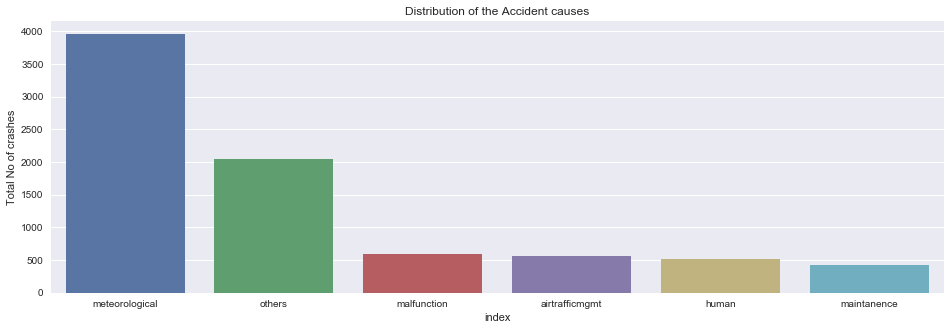

In [37]:
# Plot the distribution of causes as per the classification model
data_op = data['label'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)

sns.set(style="darkgrid")
fig = plt.figure(figsize=(16,5))

ax = sns.barplot(x = 'index', y='label', data=data_op, estimator = np.sum)
plt.title('Distribution of the Accident causes')
plt.ylabel('Total No of crashes')
fig.savefig('./assets/gen_plots/1_cause_vs_crash', bbox_inches='tight')
plt.show()

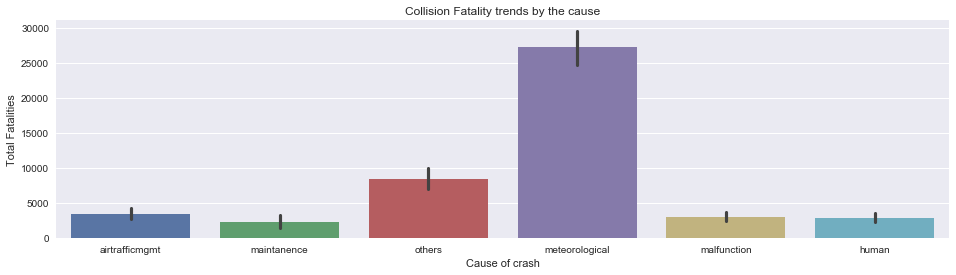

In [38]:
sns.set(style="darkgrid")

fig = plt.figure(figsize= (16,4))

# plt.xticks(rotation = 75)

ax = sns.barplot(y="Total_Fatal", x="label", data=data, estimator = np.sum)

plt.title('Collision Fatality trends by the cause')
plt.xlabel('Cause of crash')
plt.ylabel('Total Fatalities')

plt.show()
fig.savefig('./assets/gen_plots/1_cause_vs_fatality', bbox_inches='tight')

In [39]:
data.columns

Index(['Engines', 'Narrative', 'FlightNumber', 'AirplaneDamage', 'Phase',
       'DestinationAirport', 'Date', 'Time', 'DepartureAirport', 'Operator',
       'AirplaneFate', 'FirstFlight', 'Nature_Code', 'Type_Code',
       'Engine_Type', 'Engine_count', 'Crew_Fatal', 'Crew_Occ', 'Total_Fatal',
       'Total_Occ', 'Psngr_Fatal', 'Psngr_Occ', 'GndFatal', 'Coll_Fatal',
       'Crash_Elev_m', 'Day', 'Month', 'Year', 'Dep_Airport_1',
       'Dest_Airport_1', 'Age', 'Country', 'latlon', 'sub_place', 'Continents',
       'Hemisphere', 'Seasons', 'orig_latitude', 'orig_longitude', 'Decade',
       'label'],
      dtype='object')

In [40]:
# Reordering the columns, removing columns that are not required and saving it to the dataset
ordered_cols = ['FlightNumber','Time', 'Day', 'Month', 'Year','Decade',
                'AirplaneDamage', 'AirplaneFate', 'Phase', 'Crash_Elev_m','Age',
                'Operator', 'Nature_Code', 'Type_Code', 'Engine_Type', 'Engine_count',
                'Crew_Fatal', 'Crew_Occ', 'Total_Fatal', 'Total_Occ','Psngr_Fatal', 'Psngr_Occ', 'GndFatal', 'Coll_Fatal',
                'Country', 'Continents', 'Hemisphere', 'Seasons', 'orig_latitude', 'orig_longitude','label', 'Narrative']

In [41]:
data = data[ordered_cols]

In [42]:
data.head(2)

,FlightNumber,Time,Day,Month,Year,Decade,AirplaneDamage,AirplaneFate,Phase,Crash_Elev_m,Age,Operator,Nature_Code,Type_Code,Engine_Type,Engine_count,Crew_Fatal,Crew_Occ,Total_Fatal,Total_Occ,Psngr_Fatal,Psngr_Occ,GndFatal,Coll_Fatal,Country,Continents,Hemisphere,Seasons,orig_latitude,orig_longitude,label,Narrative
0,12,16:11,Thursday,FEB,2017,2010,Minor,Repaired,Taxi (TXI),0,23,North-Wright Airways,Passenger - Domestic,Beechcraft,Unknown,-1.0,0,2,0,6,0,4,0,0,Canada,North America,Northern,Winter,64.909102,-125.567917,airtrafficmgmt,A Beech 1900D aircraft operated by North-Wrigh...
1,13,06:53,Friday,MAY,2017,2010,Damaged beyond repair,-,Landing (LDG),0,38,Air Cargo Carriers,Cargo,Others,Pratt & Whitney,2.0,2,2,2,2,0,0,0,0,United States,North America,Northern,Spring,38.370485,-81.596705,maintanence,A Shorts 330 cargo plane impacted wooded terra...


In [43]:
assert(len(data.columns) == len(ordered_cols))

In [44]:
data.to_csv('./dataset/outputof1.csv', index = False)

# 7. Plot 3D

In [45]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from matplotlib import markers

In [46]:
x = data['orig_latitude']
y = data['orig_longitude']
z = data['Crash_Elev_m']
colors = ("red", "green", "blue", "yellow", "black", "orange")
groups = data['label'].unique()

In [47]:
groups

array(['airtrafficmgmt', 'maintanence', 'others', 'meteorological',
       'malfunction', 'human'], dtype=object)

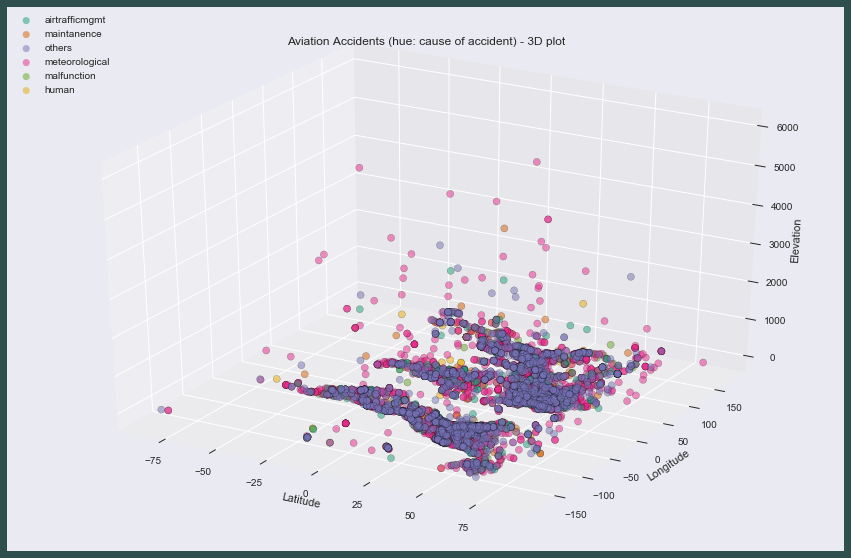

In [48]:
m_styles = markers.MarkerStyle.markers
N = 7
colormap = plt.cm.Dark2.colors
# Create plot
fig = plt.figure(figsize=(15, 10), facecolor='darkslategray')
ax = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Elevation')
for (marker, color), group in zip(itertools.product(m_styles, colormap), groups):
    x = data.ix[data['label'] == group, 'orig_latitude']
    y = data.ix[data['label'] == group, 'orig_longitude']
    z = data.ix[data['label'] == group, 'Crash_Elev_m']
    ax.scatter(x, y, z, alpha=0.5, c=color, marker = 'o', edgecolors='none', s=50, label=group)

plt.title('Aviation Accidents (hue: cause of accident) - 3D plot')
plt.legend(loc=2)
plt.show()
fig.savefig('./assets/gen_plots/1_3Dplotlabel', bbox_inches='tight')

# References: 
> 
1. http://www.airplanecrash-lawyer.com/Why-Planes-Crash/
2. http://brandonrose.org/clustering
3. http://nbviewer.jupyter.org/urls/jasonkessler.github.io/Scattertext%20Demo-%20Subjective%20vs%20Objective.ipynb
4. http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/
5. http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html